In [1]:
# script to plot sampling altitudes for each flight, show each awas and toga measurement 
# author: sofia chelpon
# created: Feb 11, 2020 

In [1]:
import numpy as np 
import xarray as xr
import pandas as pd 
import datetime 

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from mpl_toolkits import mplot3d

%matplotlib inline
%config inlinebackend.figure_format='retina'

In [2]:
mypath1 = '/Volumes/scdrive2/TTS_2020/contrast_readin/toga_lodhalf/toga_trace_gases_twp.nc'
toga_trc = xr.open_dataset(mypath1)

mypath2 = '/Volumes/scdrive2/TTS_2020/contrast_readin/awas/awas_trace_gases_twp.nc'
awas_trc = xr.open_dataset(mypath2)

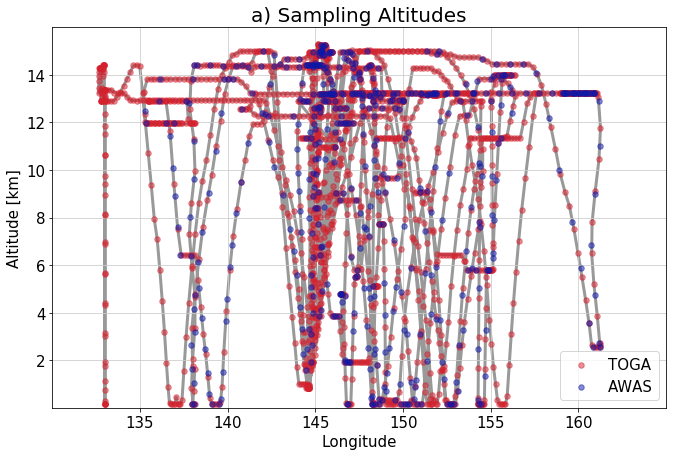

In [3]:
# plot by longitude on x axis, altitude on y axis
fig = plt.figure(figsize=(11, 7))
ax = plt.axes()

# plot general flight track first 
p = ax.plot(toga_trc.GGLON, toga_trc.GGALT/1000, c = '0.6', linewidth = 3, zorder = 1)
ax.set_title('a) Sampling Altitudes', fontsize=20)

# axes, labels, ticks, .... 
ax.set_ylim([0, 16])
ax.set_yticks(np.arange(2, 16, step = 2))
ax.set_ylabel('Altitude [km]', fontsize=15)

ax.set_xlim([130, 165])
ax.set_xticks(np.arange(135, 165, step = 5))
ax.set_xlabel('Longitude', fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.grid(which='major', linestyle='-', color = '0.8')

# add markers for toga
color_toga = [[0.83, 0.13, 0.18]]
p2 = ax.scatter(toga_trc.GGLON, toga_trc.GGALT/1000, 30, c = color_toga, zorder = 2, 
                alpha = 0.5, label = 'TOGA')

# add markers for awas 
color_awas = [[0.05, 0.09, 0.66]]
p3 = ax.scatter(awas_trc.GGLON, awas_trc.GGALT/1000, 30, c = color_awas, zorder = 3, 
                alpha = 0.5, label = 'AWAS')

# add legend
ax.legend(loc = 'lower right', fontsize = 15)

# save figure 
#fig.savefig('sampling_altitudes.svg', format='svg', dpi=1200)
fig.savefig('sampling_altitudes.pdf')  